# Import

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')

# Data Creation and Split

In [55]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)

print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))
print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# shape of training and test set
print('X_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)
y_test:		(1980,)


In [56]:
print(np.max(X_train))
print(np.min(X_train))

2.3659865251916825
-1.3797640818403294


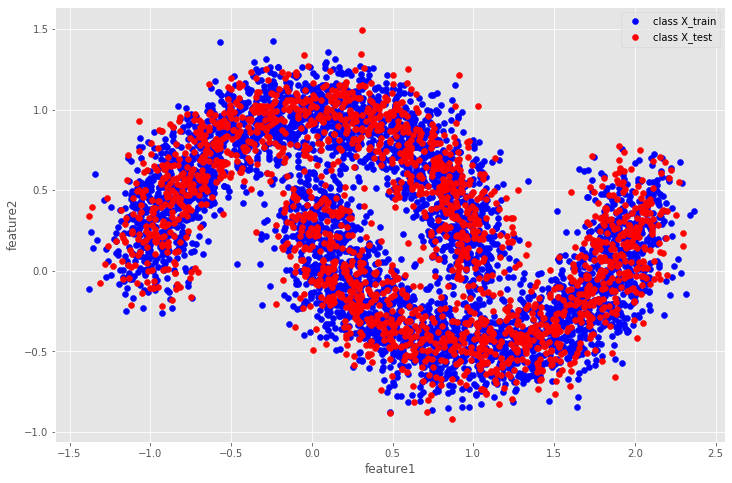

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [58]:
# Hyper-parameters
training_epochs = 100 #Total number of training epochs
learning_rate = 0.03 # The learning rate


In [59]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
  return model

In [60]:
# make a shallow neural network
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 6)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [61]:
# training 
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T)
)

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5988 - accuracy: 0.7095 - val_loss: 0.4630 - val_accuracy: 0.8293
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8201 - val_loss: 0.3287 - val_accuracy: 0.8460
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8567 - val_loss: 0.2737 - val_accuracy: 0.8753
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8704 - val_loss: 0.2778 - val_accuracy: 0.8692
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2823 - accuracy: 0.8719 - val_loss: 0.2649 - val_accuracy: 0.8742
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2766 - accuracy: 0.8744 - val_loss: 0.2653 - val_accuracy: 0.8798
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.8734 - val_loss: 0.2622 - val_accuracy: 0.8763
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9905 - val_loss: 0.0234 - val_accuracy: 0.9939
Epoch 60/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0234 - val_accuracy: 0.9939
Epoch 61/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0236 - val_accuracy: 0.9914
Epoch 62/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0233 - val_accuracy: 0.9944
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0219 - val_accuracy: 0.9949
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.0219 - val_accuracy: 0.9929
Epoch 65/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.0231 - val_accuracy: 0.9944
Epoch 66/100
8/8 [===============

In [62]:
print('Mean value of accuracy during training time is : %.2f' %np.mean(results.history["val_accuracy"]))

Mean value of accuracy during training time is : 0.97


In [63]:
prediction_values = model.predict(X_test)
prediction_values.shape # our neural network outputs predictions of labels for training set

62/62 [==============================] - 0s 448us/step


(1980, 1)

In [64]:
print(model.metrics_names[:])

['loss', 'accuracy']


Maximum Loss : 0.5988

Minimum Loss : 0.0268

Loss difference : 0.5720


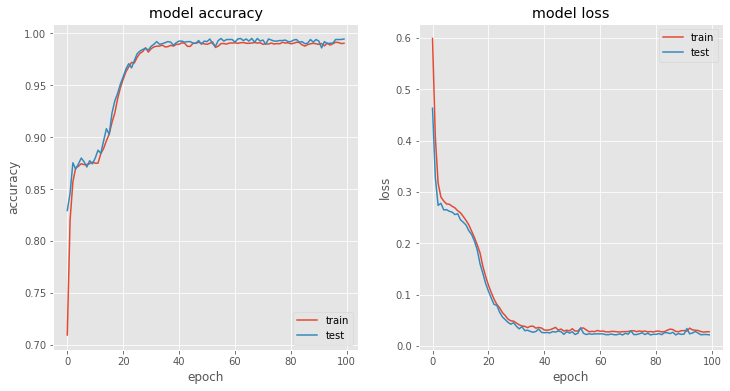

In [65]:
plt.figure(figsize =(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

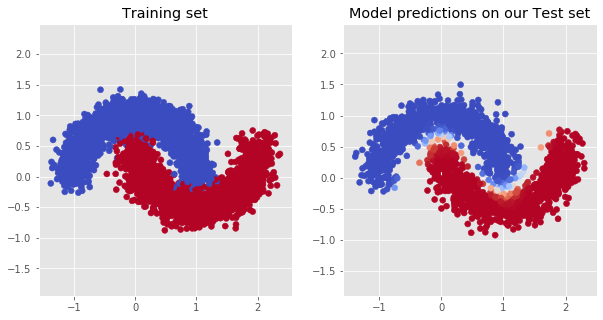

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

# Visualize Decision Boundary

50/50 [==============================] - 0s 489us/step


Text(0.5, 1.0, 'Model predictions on our Test set')

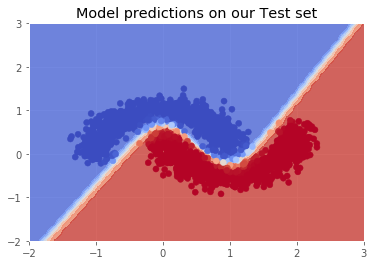

In [67]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')